<a href="https://colab.research.google.com/github/Ans365332/6may-file-example/blob/main/EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/googleplaystore (1) - googleplaystore (1).csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
# Here we check weather the dataset is having the duplicate value or not
df.duplicated().sum()

np.int64(483)

In [5]:
# Dropping the duplicate value from dataset
df.drop_duplicates(inplace=True)

In [14]:
df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')

In [12]:
df['Size']=df['Size'].replace('Varies with device',np.nan)
df['Size']=df['Size'].str.replace('M','')
df['Size']=df['Size'].str.replace('k','')
df['Size']=df['Size'].replace('Varies with device',np.nan)
df['Size']=pd.to_numeric(df['Size'],errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10357 non-null  float64
 4   Size            8831 non-null   float64
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


# Univariant analysis

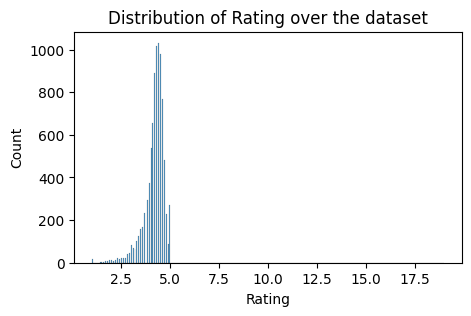

In [16]:
plt.figure(figsize=(5,3))
sns.histplot(x=df['Rating'],data=df)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Rating over the dataset')
plt.show()

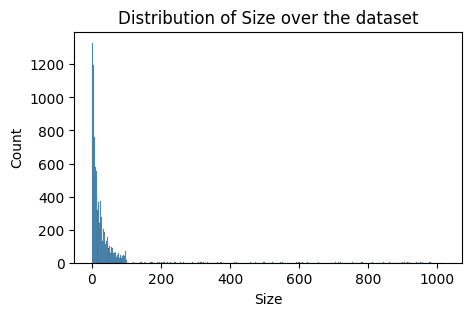

In [17]:
plt.figure(figsize=(5,3))
sns.histplot(x=df['Size'],data=df)
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Distribution of Size over the dataset')
plt.show()

In [21]:
df['Reviews']

,Reviews
0,159.0
1,967.0
2,87510.0
3,215644.0
4,967.0
...,...
10836,38.0
10837,4.0
10838,3.0
10839,114.0


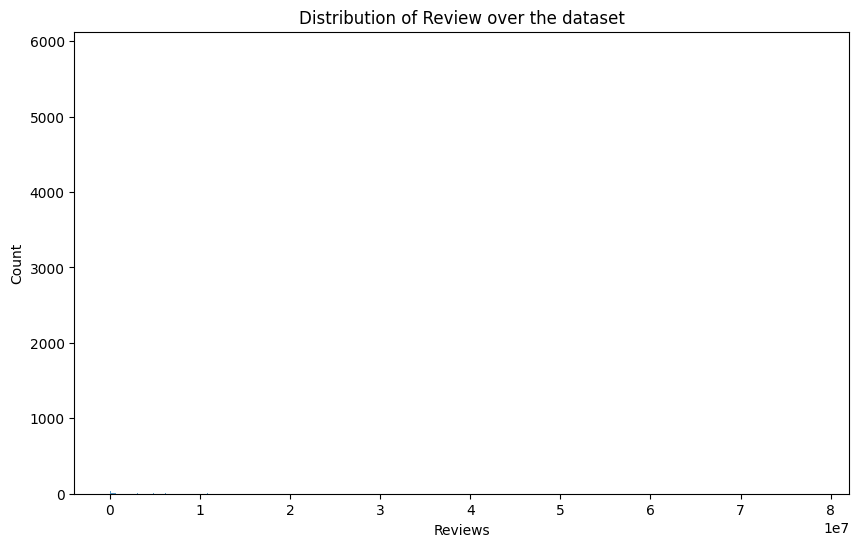

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['Reviews'],data=df)
plt.xlabel('Reviews')
plt.ylabel('Count')
plt.title('Distribution of Review over the dataset')
plt.show()

<Axes: xlabel='Reviews'>

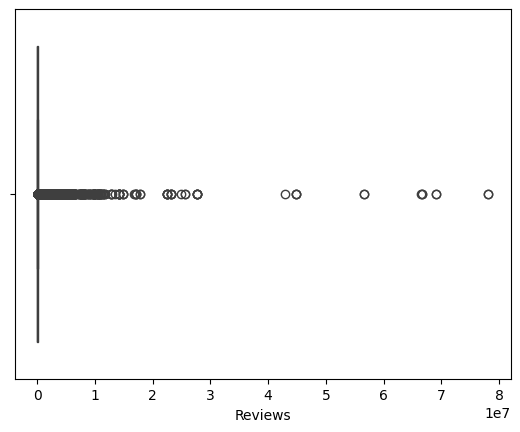

In [26]:
sns.boxplot(x=df['Reviews'],data=df)

# insights of review-->

There are many outlier are present into the review column

most of the review are into the range of (1*10**7)--> around 0

most of the outliers are around 0 to 1

<Axes: xlabel='Reviews', ylabel='Density'>

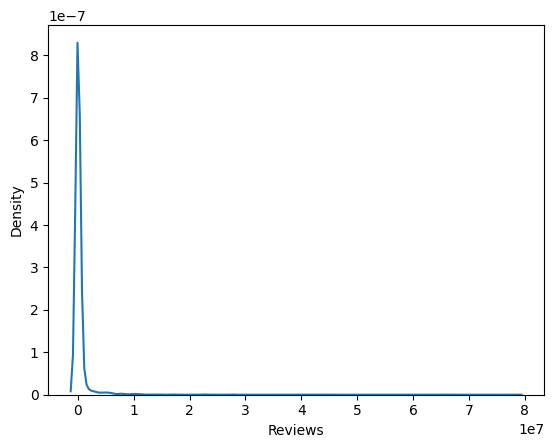

In [27]:
sns.kdeplot(x=df['Reviews'],data=df)  # right skewed data--(tail on right side)

<Axes: xlabel='Reviews'>

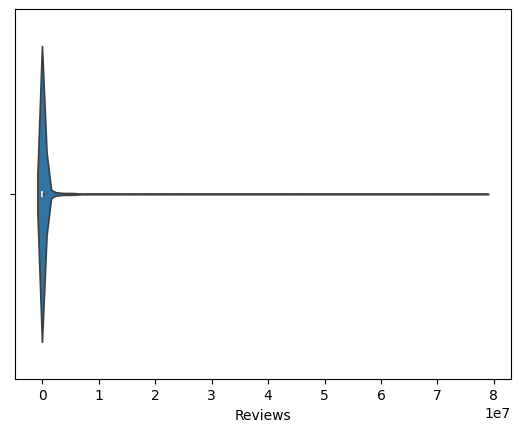

In [28]:
sns.violinplot(x=df['Reviews'],data=df)

# analysis for the size column-->

<Axes: xlabel='Size', ylabel='Count'>

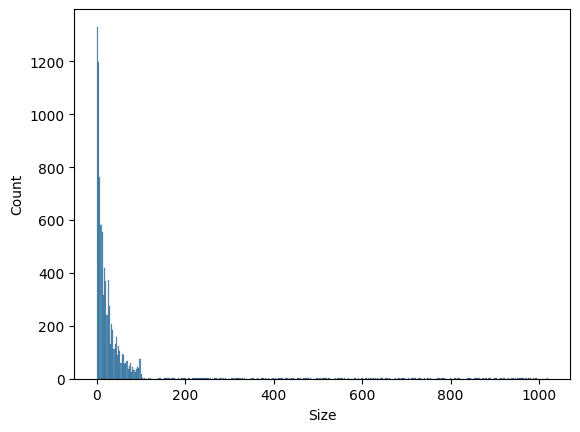

In [29]:
sns.histplot(x=df['Size'],data=df)  # right skewed data

<Axes: xlabel='Size', ylabel='Count'>

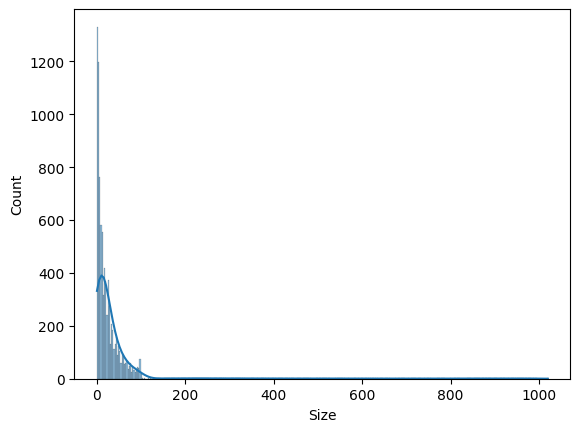

In [30]:
sns.histplot(x=df['Size'],data=df,kde=True)

<Axes: xlabel='Size'>

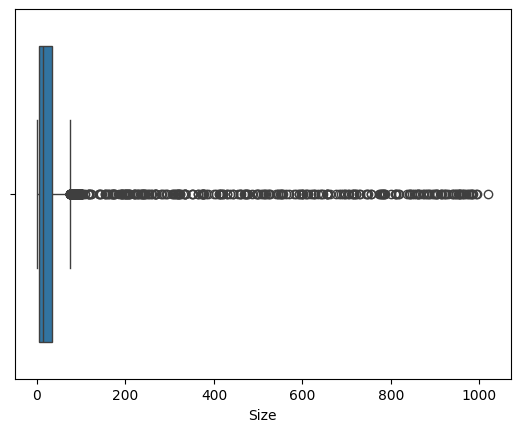

In [31]:
sns.boxplot(x=df['Size'],data=df)

# Insights of size column

1.most of the data are lie in range of 0-100

2.there are many outlier are present in the size column

3.it is right skewed data

4.most of data are dense between o-100

# for categorical columns->

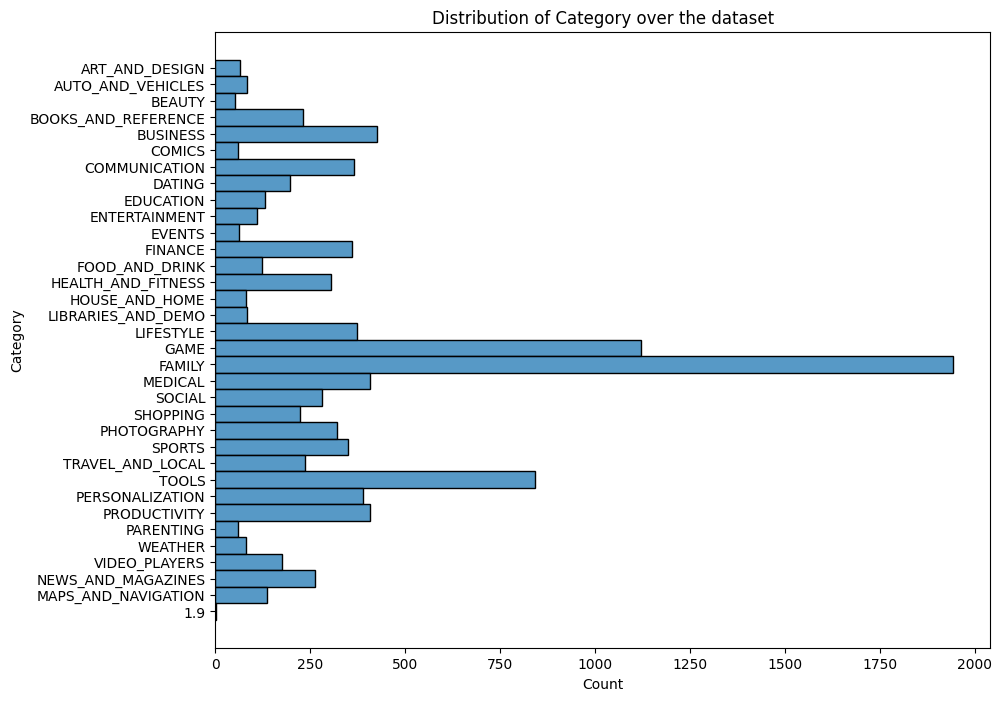

In [33]:
plt.figure(figsize=(10,8))
sns.histplot(y=df['Category'],data=df)
plt.ylabel('Category')
plt.xlabel('Count')
plt.title('Distribution of Category over the dataset')
plt.show()

# Insights of category-->

1,

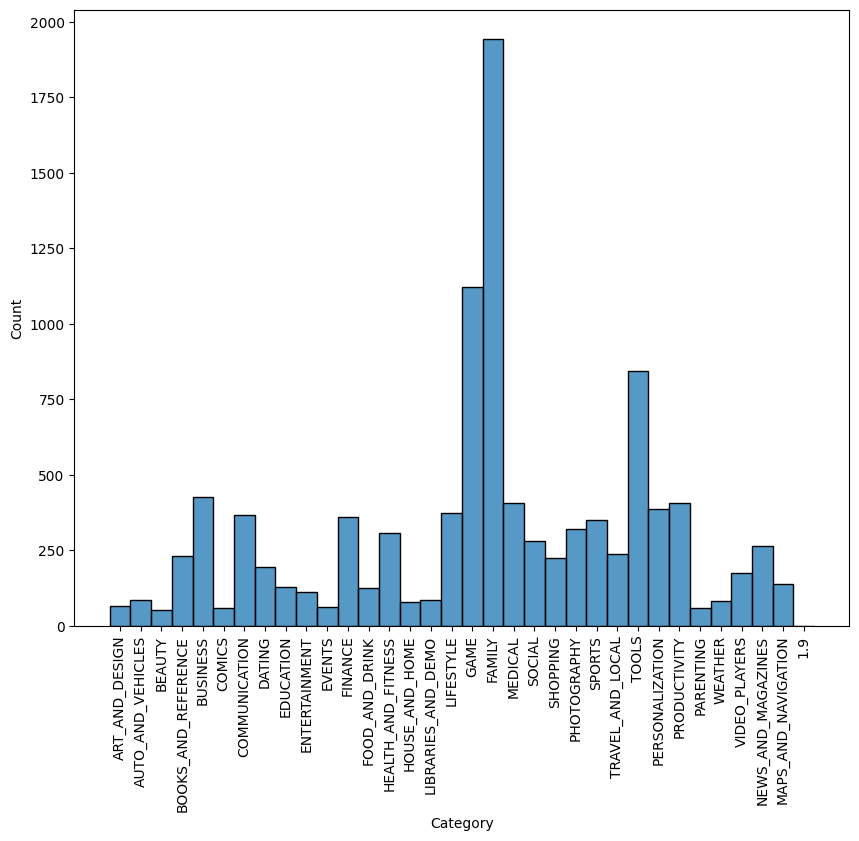

In [36]:
plt.figure(figsize=(10,8))
sns.histplot(x=df['Category'],data=df)
plt.xticks(rotation=90)

plt.show()

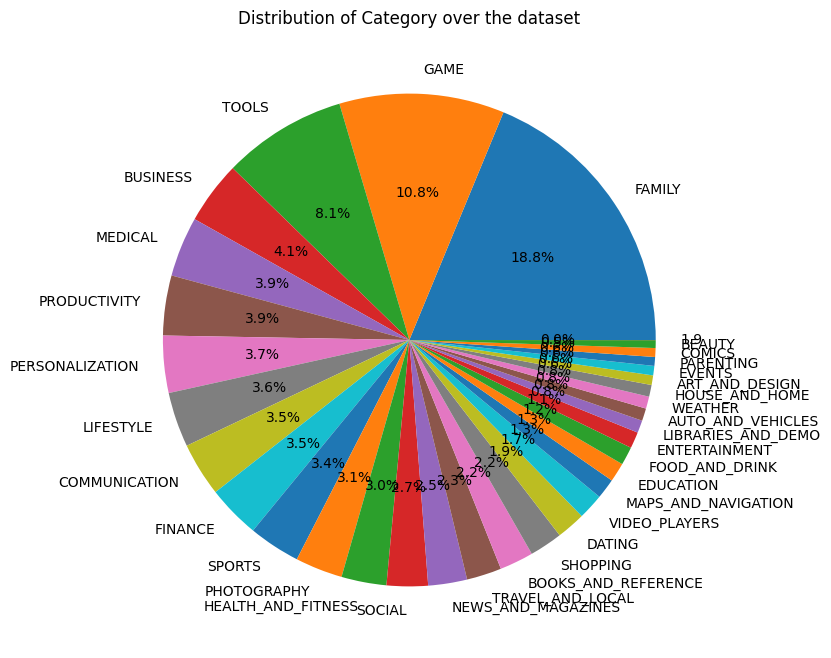

In [40]:
# using pie

plt.figure(figsize=(10,8))
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%')
plt.title('Distribution of Category over the dataset')
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10357 non-null  float64
 4   Size            8831 non-null   float64
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [42]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

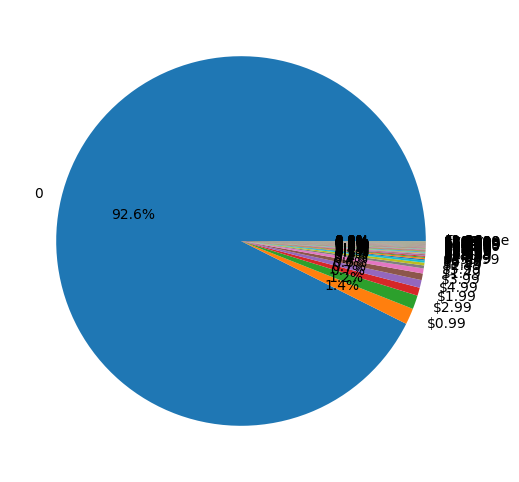

In [47]:
plt.figure(figsize=(10,6))
plt.pie(df['Price'].value_counts(),labels=df['Price'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10357 non-null  float64
 4   Size            8831 non-null   float64
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


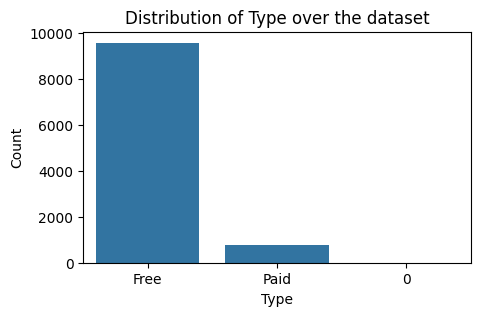

In [50]:
# for type column
plt.figure(figsize=(5,3))
sns.countplot(x=df['Type'],data=df)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Type over the dataset')
plt.show()

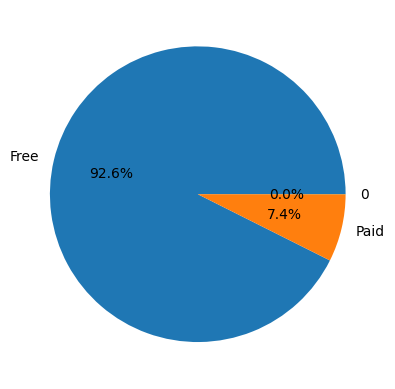

In [52]:
plt.pie(df['Type'].value_counts(),labels=df['Type'].value_counts().index,autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Type', ylabel='count'>

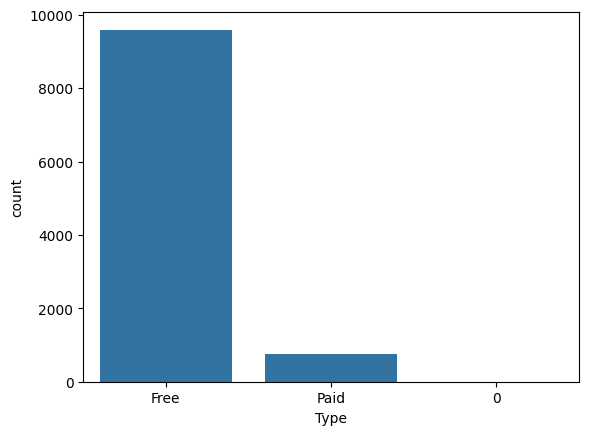

In [53]:
sns.barplot(x=df['Type'].value_counts().index,y=df['Type'].value_counts())

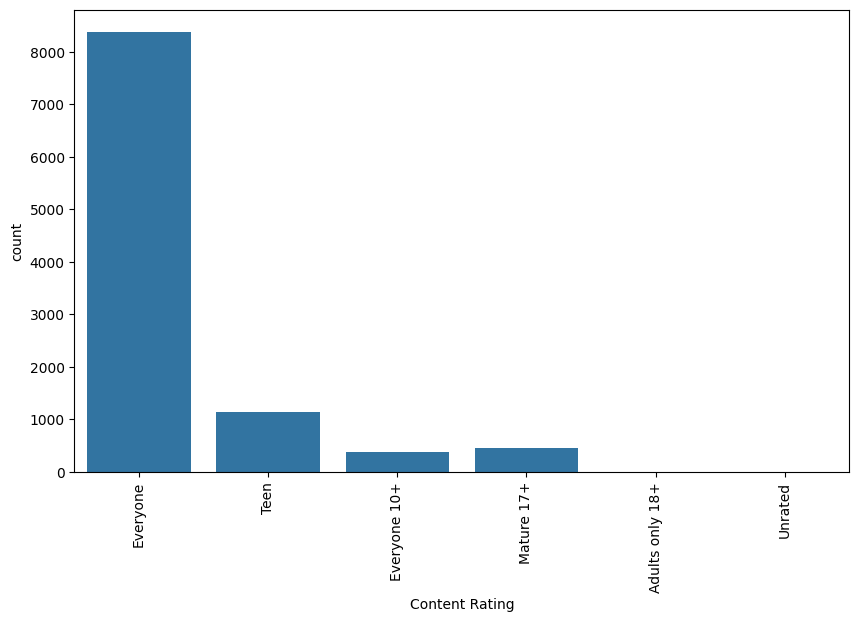

In [54]:
# for content Rating column
plt.figure(figsize=(10,6))
sns.countplot(x=df['Content Rating'],data=df)
plt.xticks(rotation=90)
plt.show()

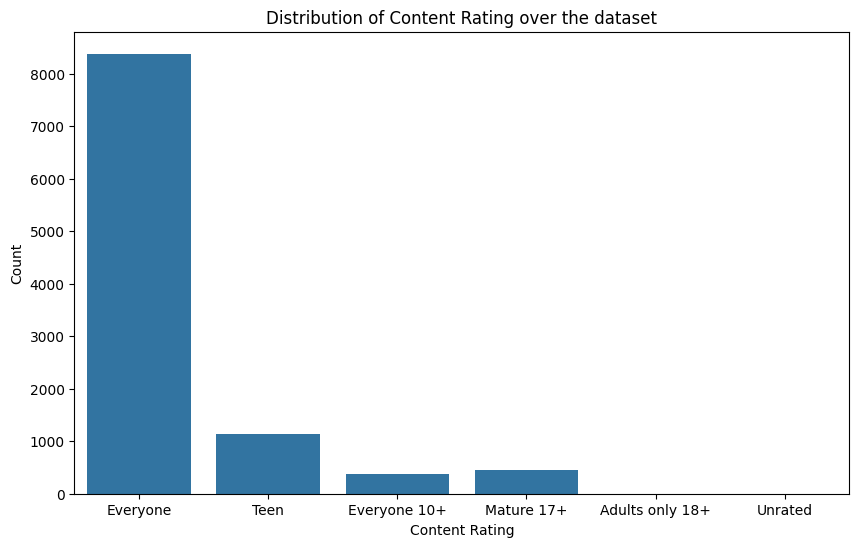

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Content Rating'],data=df)
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Distribution of Content Rating over the dataset')
plt.show()